## Music and Mental Health EDA

This Analysis is based on a survey for the assessment of the link between the habit of listening to music and its effect on different mental health issues.
Check the data from here: https://www.kaggle.com/datasets/catherinerasgaitis/mxmh-survey-results

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
df = pd.read_csv("mxmh_survey_results.csv")
df.head()

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Timestamp                     736 non-null    object 
 1   Age                           735 non-null    float64
 2   Primary streaming service     735 non-null    object 
 3   Hours per day                 736 non-null    float64
 4   While working                 733 non-null    object 
 5   Instrumentalist               732 non-null    object 
 6   Composer                      735 non-null    object 
 7   Fav genre                     736 non-null    object 
 8   Exploratory                   736 non-null    object 
 9   Foreign languages             732 non-null    object 
 10  BPM                           629 non-null    float64
 11  Frequency [Classical]         736 non-null    object 
 12  Frequency [Country]           736 non-null    object 
 13  Frequ

## Respondent' Background

### 1. Music

array([[<AxesSubplot:title={'center':'Age'}>]], dtype=object)

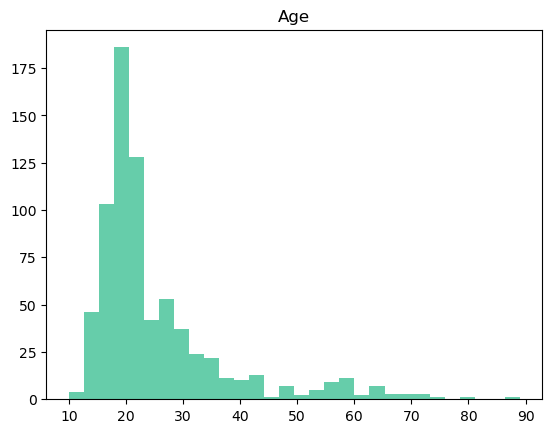

In [11]:
df.hist(['Age'], bins = 30, color = 'mediumaquamarine', grid = False)

In [13]:
df['Age'].value_counts().loc[lambda x: x>50]

18.0    85
19.0    61
17.0    59
21.0    52
Name: Age, dtype: int64

In [14]:
df['Age'].max()

89.0

Most respondents are in their late teens or early twenties. A single 89 year old respondent is an outlier.

This reflcts on the way this data was collected as it was collected from social media, This represents an age bias.

In [18]:
services = df['Primary streaming service'].value_counts()
services

Spotify                              458
YouTube Music                         94
I do not use a streaming service.     71
Apple Music                           51
Other streaming service               50
Pandora                               11
Name: Primary streaming service, dtype: int64

Text(0, 0.5, '')

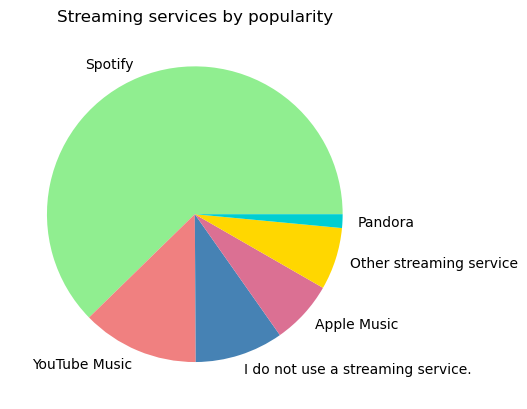

In [21]:
s_colors = ['lightgreen', 'lightcoral', 'steelblue', 'palevioletred', 'gold', 'darkturquoise']

services = df['Primary streaming service'].value_counts()
services.plot(kind= 'pie', colors = s_colors)

plt.title('Streaming services by popularity')
plt.ylabel("")


From this we conclude that the most used streaming service is Spotify then Youtube music.

In [28]:
df['Primary streaming service'].value_counts(normalize=True)

Spotify        0.623129
YouTube        0.127891
None           0.096599
Apple Music    0.069388
Other          0.068027
Pandora        0.014966
Name: Primary streaming service, dtype: float64

Text(0.5, 1.0, 'Streaming Service by Age')

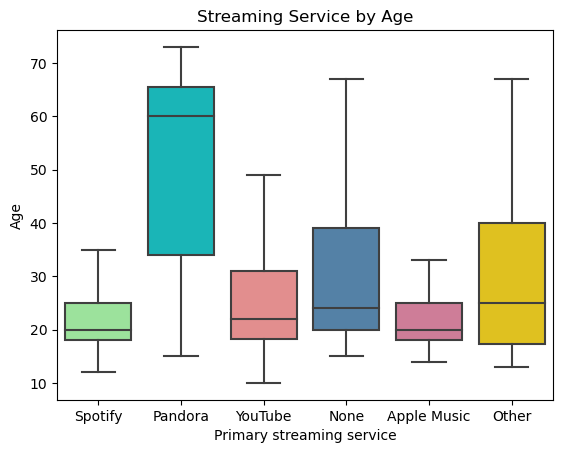

In [26]:
s_colors2 = ['lightgreen', 'darkturquoise', 'lightcoral', 'steelblue', 'palevioletred', 'gold']

df.replace(['Other streaming service', 'I do not use a streaming service.', 'YouTube Music'],
                       ['Other', 'None', 'YouTube'], inplace=True)

bplot = sns.boxplot(data= df, x='Primary streaming service', y='Age',
                                showfliers = False,
                                palette = s_colors2)

plt.title('Streaming Service by Age')

From here we can say that Apple music and spotify are popular with younger ages while pandora is popular with older ages and in the middle is youtube.

In [29]:
s_df = df.groupby(['Primary streaming service'])
s_ages = []
s_ages.append(s_df['Age'].median())

s_ages

[Primary streaming service
 Apple Music    20.0
 None           24.0
 Other          25.0
 Pandora        60.0
 Spotify        20.0
 YouTube        22.0
 Name: Age, dtype: float64]

Spotify is the most popular music streaming service, accounting for 62% of all respondents. Spotify, along with Apple Music, also has a marginally younger userbase than other streaming platforms. Pandora has the oldest user base by far, with the median user age at ~60 years old.

array([[<AxesSubplot:title={'center':'Hours per day'}>]], dtype=object)

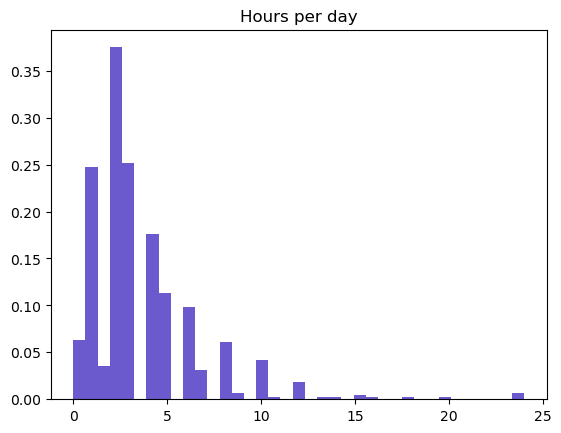

In [34]:
df.hist(['Hours per day'], bins='auto', density=True, color='slateblue', grid=False)

In [36]:
df['Hours per day'].value_counts().loc[lambda x: x>100]

2.0    173
3.0    120
1.0    117
Name: Hours per day, dtype: int64

Most people listen to music for 2 to 3 hours per day and the perfect range is from 0 to 5 hours per day and then the amount of time decreases significantly, some people claim to listen to music 24 hours a day which is an outlier for me.

<AxesSubplot:ylabel='Composer'>

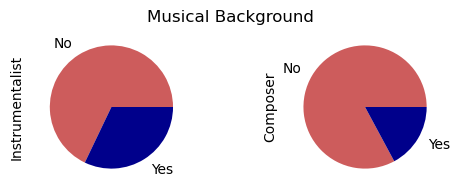

In [40]:
fig = plt.figure(figsize = (6,2))

plt.suptitle('Musical Background')

ax = fig.add_subplot(121)

inst = df['Instrumentalist'].value_counts()
inst.plot(kind='pie', colors = ["indianred", "darkblue"], labeldistance = 1.2)

ax = fig.add_subplot(122)
comp = df['Composer'].value_counts()
comp.plot(kind= 'pie', colors = ["indianred", "darkblue"], labeldistance = 1.2)

Instrumentalists and composers have slightly higher MH rankings. However, OCD rankings are low regardless of musical background.

In [63]:
df.replace(['No', 'Yes'],
                       [0, 1], inplace=True)

C:\Users\Windows 10\AppData\Local\Temp\ipykernel_7652\904701000.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  b1 = ax.bar(x-2*width, df[(df.Instrumentalist == 0)].median()[-4:], width, color = 'indianred', label = "Non Instrumentalist")
C:\Users\Windows 10\AppData\Local\Temp\ipykernel_7652\904701000.py:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  b2 = ax.bar(x-width, df[(df.Instrumentalist == 1)].median()[-4:], width, color = 'darkred', label = "Instrumentalist" )
C:\Users\Windows 10\AppData\Local\Temp\ipykernel_7652\904701000.py:9: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; i

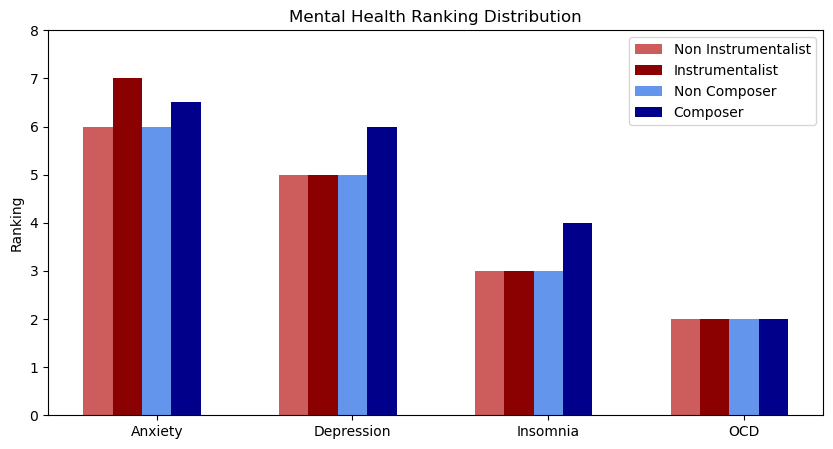

In [74]:
labels = ['Anxiety', 'Depression','Insomnia', 'OCD']
x = np.arange(len(labels))
width = 0.15

fig, ax = plt.subplots(figsize=(10,5))

b1 = ax.bar(x-2*width, df[(df.Instrumentalist == 0)].median()[-4:], width, color = 'indianred', label = "Non Instrumentalist")
b2 = ax.bar(x-width, df[(df.Instrumentalist == 1)].median()[-4:], width, color = 'darkred', label = "Instrumentalist" )
b3 = ax.bar(x, df[(df.Composer == 0)].median()[-4:], width, color = 'cornflowerblue', label = "Non Composer")
b4 = ax.bar(x+width, df[(df.Composer == 1)].median()[-4:], width, color = 'darkblue', label = "Composer")

ax.set_ylim([0,8])
ax.set_ylabel('Ranking')
ax.set_title('Mental Health Ranking Distribution')
ax.set_xticks(x, labels)
ax.legend()

plt.show()

Instrumentalists and composers have slightly higher MH rankings. However, OCD rankings are low regardless of musical background.

In [65]:
df.corr()

,Age,Hours per day,While working,Instrumentalist,Composer,Exploratory,Foreign languages,BPM,Anxiety,Depression,Insomnia,OCD
Age,1.000000,-0.044638,-0.080591,-0.130257,-0.035002,-0.178837,-0.138228,-0.029928,-0.176662,-0.121563,0.006909,-0.130114
Hours per day,-0.044638,1.000000,0.282035,-0.022053,0.133454,0.141783,0.088773,0.042554,0.049319,0.110527,0.141821,0.118729
While working,-0.080591,0.282035,1.000000,0.083186,0.048571,0.139844,0.120077,0.020206,0.038231,0.055952,0.034804,0.082326
Instrumentalist,-0.130257,-0.022053,0.083186,1.000000,0.403337,0.073866,-0.017374,-0.028014,0.026933,0.006122,0.026783,0.013959
Composer,-0.035002,0.133454,0.048571,0.403337,1.000000,0.097124,-0.040323,-0.018371,0.002770,0.050910,0.094291,0.012853
Exploratory,-0.178837,0.141783,0.139844,0.073866,0.097124,1.000000,0.181607,0.024187,0.021250,0.061541,0.053356,0.032219
Foreign languages,-0.138228,0.088773,0.120077,-0.017374,-0.040323,0.181607,1.000000,-0.045485,0.085667,0.090668,0.034902,-0.022305
BPM,-0.029928,0.042554,0.020206,-0.028014,-0.018371,0.024187,-0.045485,1.000000,-0.027050,0.041371,0.053591,0.018927
Anxiety,-0.176662,0.049319,0.038231,0.026933,0.002770,0.021250,0.085667,-0.027050,1.000000,0.519969,0.292669,0.348350
Depression,-0.121563,0.110527,0.055952,0.006122,0.050910,0.061541,0.090668,0.041371,0.519969,1.000000,0.378996,0.196988


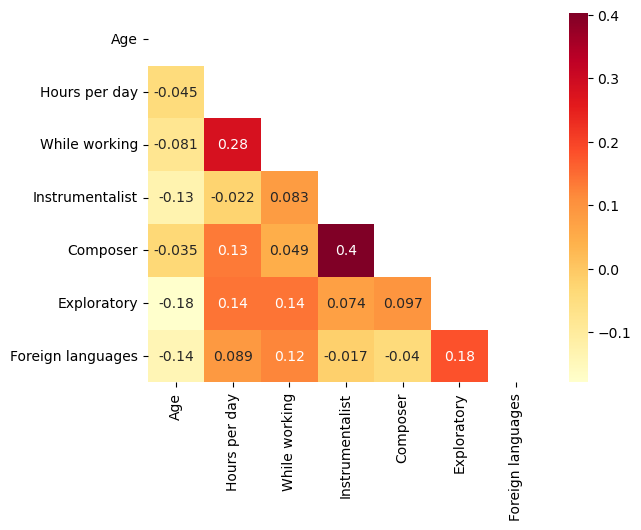

In [66]:
corr_m = df.corr()
corr_m1 = corr_m.iloc[:-5, :-5]

mask = np.triu(corr_m1)
sns.heatmap(corr_m1, annot=True, mask=mask, cmap= 'YlOrRd')
plt.show()

**Strong linear trends**

As expected, there is a a significant correlation between individuals that play music and individuals that compose music. Similarly, there is also a strong relationship between the total hours listening per day and hours listening while working.

**Weaker linear trends: exploratory respondents**

- The more hours spent listening to music, the more likely an individual actively explores new music.
- Individuals that listen to music while working are more likely to explore new music and listen to music in different languages.
- Individuals that listen to music in foreign languages are more likely to explore new music.
- Older individuals are less inclined to explore new music.

## 2. Mental Health

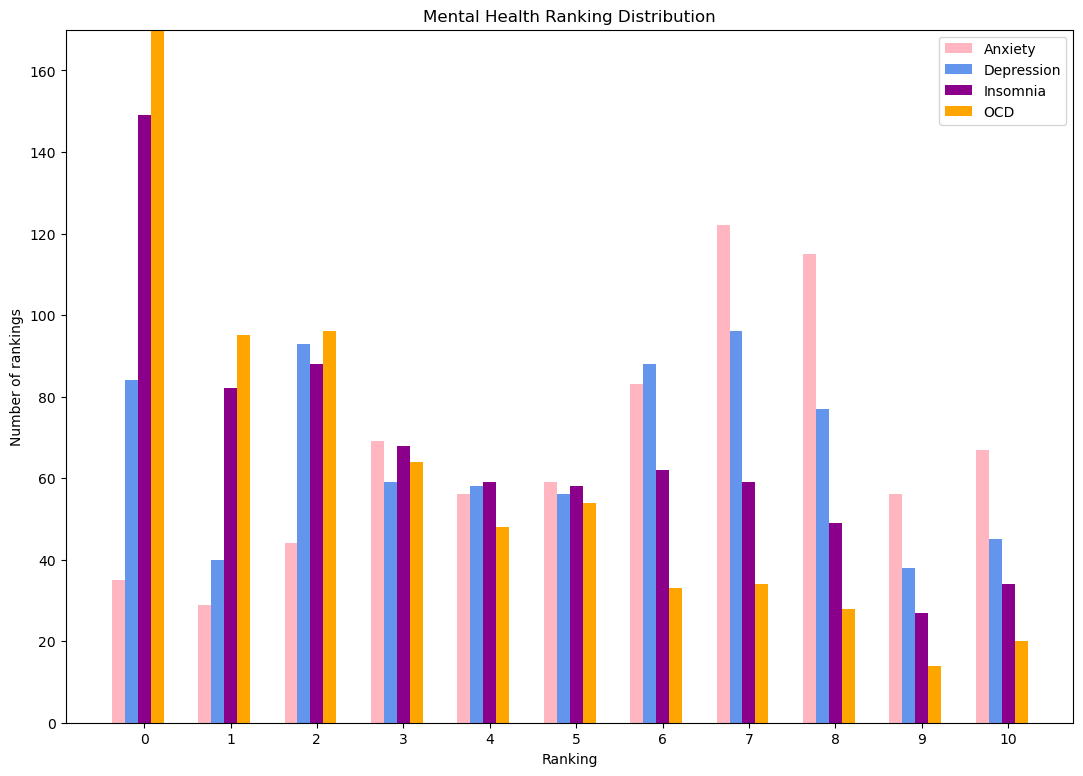

In [85]:
m_all = ["Anxiety", "Depression", "Insomnia", "OCD"]

mental_df = df[m_all]
mental_df.round(0).astype(int)

disorder_count = []
for disorder in m_all:
    x=0
    while x!= 11:
        count = (mental_df[disorder].values == x).sum()
        disorder_count.append(count)
        x +=1

labels = ['0','1','2','3','4','5','6','7','8','9','10']
x = np.arange(len(labels))
width = 0.15

fig, ax = plt.subplots(figsize=(13,9))

b1 = ax.bar(x-2*width, disorder_count[0:11], width, label = 'Anxiety', color = 'lightpink')
b2 = ax.bar(x-width, disorder_count[11:22], width, label = 'Depression', color = 'cornflowerblue')
b3 = ax.bar(x, disorder_count[22:33], width,label="Insomnia", color = 'darkmagenta')
b4 = ax.bar(x+width, disorder_count[33:], width, label="OCD", color = 'orange')

ax.set_ylim([0,170])
ax.set_ylabel('Number of rankings')
ax.set_xlabel('Ranking')
ax.set_title('Mental Health Ranking Distribution')
ax.set_xticks(x, labels)
ax.legend()

plt.show()

In [84]:
# et value for number of OCD rankins at 0

max(disorder_count)

248

In [87]:
for disorder in m_all:
    d_avg = str(round(df[disorder].mean(), 2))
    print(disorder + ' average: ' + d_avg)

Anxiety average: 5.84
Depression average: 4.8
Insomnia average: 3.74
OCD average: 2.64


**Form the average and from the chart we can say that:**
- For Anxiety we have an elevation in the counts wile inceasin in rank wit an averge rank of 6.
- For depression we a relatively close ranking counts but there's an observed elevation while increasing in ranking with an average rank of 5.
- For insomnia there's an observed decrease in counts while increasing in rank but still we have high counts with an average of 4.
- OCD  is the least common disorder with decreasing count while increasing rank and with an average of 3.


### Listening time and mental health 

C:\Users\Windows 10\AppData\Local\Temp\ipykernel_7652\3628676750.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  anxiety_extreme = df.loc[(df['Anxiety']> 8)].mean()[1]
C:\Users\Windows 10\AppData\Local\Temp\ipykernel_7652\3628676750.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  depression_extreme = df.loc[(df['Depression'] > 8)].mean()[1]
C:\Users\Windows 10\AppData\Local\Temp\ipykernel_7652\3628676750.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  insomnia_extreme = df.

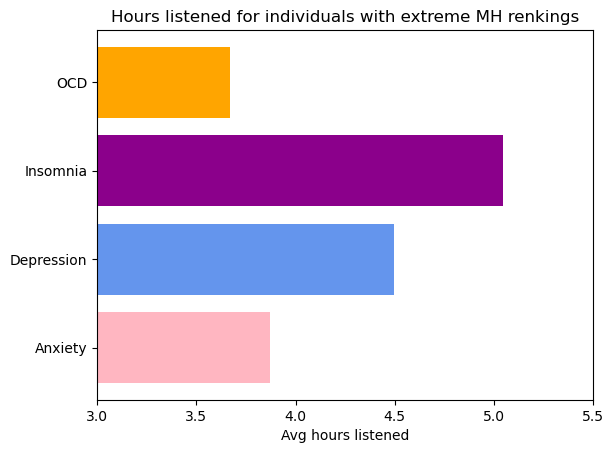

In [96]:
anxiety_extreme = df.loc[(df['Anxiety']> 8)].mean()[1]
depression_extreme = df.loc[(df['Depression'] > 8)].mean()[1]
insomnia_extreme = df.loc[(df['Insomnia'] > 8)].mean()[1]
ocd_extreme = df.loc[(df['OCD'] > 8)].mean()[1]

extreme_means = [anxiety_extreme, depression_extreme, insomnia_extreme, ocd_extreme]

plt.barh(m_all, extreme_means, color=('lightpink','cornflowerblue','darkmagenta','orange'))

plt.xlabel('Avg hours listened')
plt.title('Hours listened for individuals with extreme MH renkings')
plt.xlim(3,5.5)
plt.show()

From the chart we can assume that people with extrem insomnia (with 9 or 10 rank) listen to music for more hours compared to other disorders unlike OCD which ranks lst in this comparison.

Taking into consideration that some individuals may be present in multiple extreme categories if they answered 9 or 10 for more than 1 disorder.

C:\Users\Windows 10\AppData\Local\Temp\ipykernel_7652\1018574114.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  anxiety_extreme2 = df.loc[(df['Anxiety'] < 3)].mean()[1]
C:\Users\Windows 10\AppData\Local\Temp\ipykernel_7652\1018574114.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  depression_extreme2 = df.loc[(df['Depression'] < 3)].mean()[1]
C:\Users\Windows 10\AppData\Local\Temp\ipykernel_7652\1018574114.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  insomnia_extreme2 =

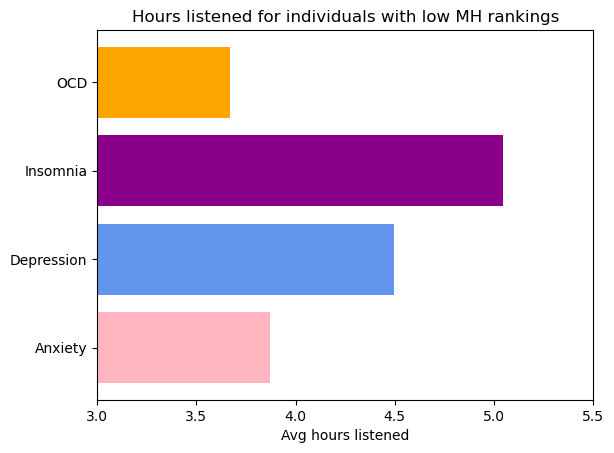

In [103]:
# Now we will calculate the lowest extremes 
anxiety_extreme2 = df.loc[(df['Anxiety'] < 3)].mean()[1]
depression_extreme2 = df.loc[(df['Depression'] < 3)].mean()[1]
insomnia_extreme2 = df.loc[(df['Insomnia'] < 3)].mean()[1]
ocd_extreme2 = df.loc[(df['OCD'] < 3)].mean()[1]

extreme_means = [anxiety_extreme, depression_extreme, insomnia_extreme, ocd_extreme]

plt.barh(m_all, extreme_means, color=('lightpink', 'cornflowerblue', 'darkmagenta', 'orange'))
  
plt.xlabel("Avg hours listened")
plt.title("Hours listened for individuals with low MH rankings")
plt.xlim(3,5.5)
plt.show()


After making that chart I don't think I will take these results into consideration as it somehow similar so It might be that people with multiple high and low disorders ranking missed up the calculation.

<AxesSubplot:title={'center':'Music effects on mental health'}, ylabel=' '>

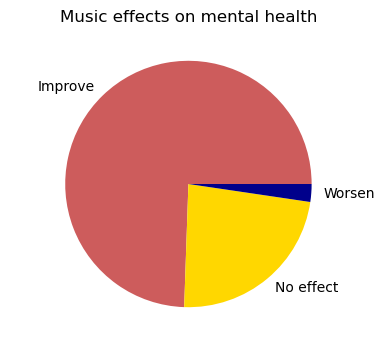

In [105]:
plt.figure(figsize=(5,4))
plt.title('Music effects on mental health')

effects = df['Music effects'].value_counts()
effects.plot(kind = 'pie', colors = ["indianred", "gold", "darkblue"], ylabel=" ")


In [106]:
effects

Improve      542
No effect    169
Worsen        17
Name: Music effects, dtype: int64

The majority of people thinks that listening to music improve their mental health, only 17 think it has a negative impact. 

## Music Genre

In [108]:
df['Fav genre'].value_counts()

Rock                188
Pop                 114
Metal                88
Classical            53
Video game music     44
EDM                  37
R&B                  35
Hip hop              35
Folk                 30
K pop                26
Country              25
Rap                  22
Jazz                 20
Lofi                 10
Gospel                6
Latin                 3
Name: Fav genre, dtype: int64

Text(0, 0.5, ' ')

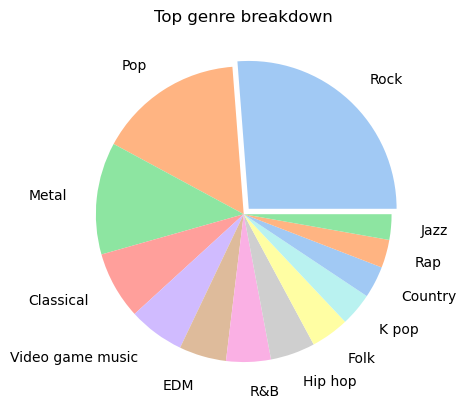

In [115]:
genre = df["Fav genre"].value_counts().loc[lambda x: x>10]
genre.plot(kind = "pie", labeldistance = 1.2 , 
            explode = [0.05, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,],
            colors = sns.color_palette('pastel'))

plt.title('Top genre breakdown')
plt.ylabel(" ")

Most popular music genre is Rock then pop and metal. Lofi, Gospel and Latin are the least and didn't appear in the pie chart.

Text(0.5, 1.0, 'Age distribution by genre')

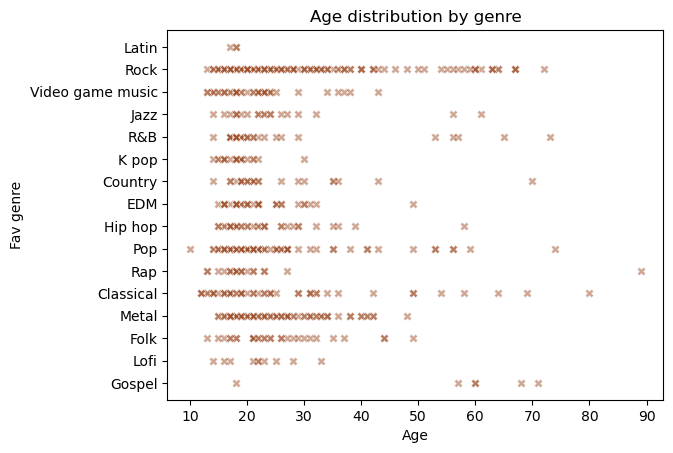

In [9]:
# age and genre
sns.scatterplot(data=df, y="Fav genre", x="Age", alpha = 0.5, marker = "X", color="sienna")
plt.title('Age distribution by genre')

Rock has a wide range of listeners also classical and pop. some genres appear to attract more younger age group like k-pop.

### BPM

In [25]:
print(df['BPM'].max())
print(df['BPM'].min())


999999999.0
0.0


The survey results aren't perfect. People claiming to listen to music with 999999999 BPM may mess up data.

In [27]:
# We will solve this by creating upper and lower bounds
df = df[(df.BPM < 500) & (df.BPM > 20)]
print(df['BPM'].max())
print(df['BPM'].min())

220.0
40.0


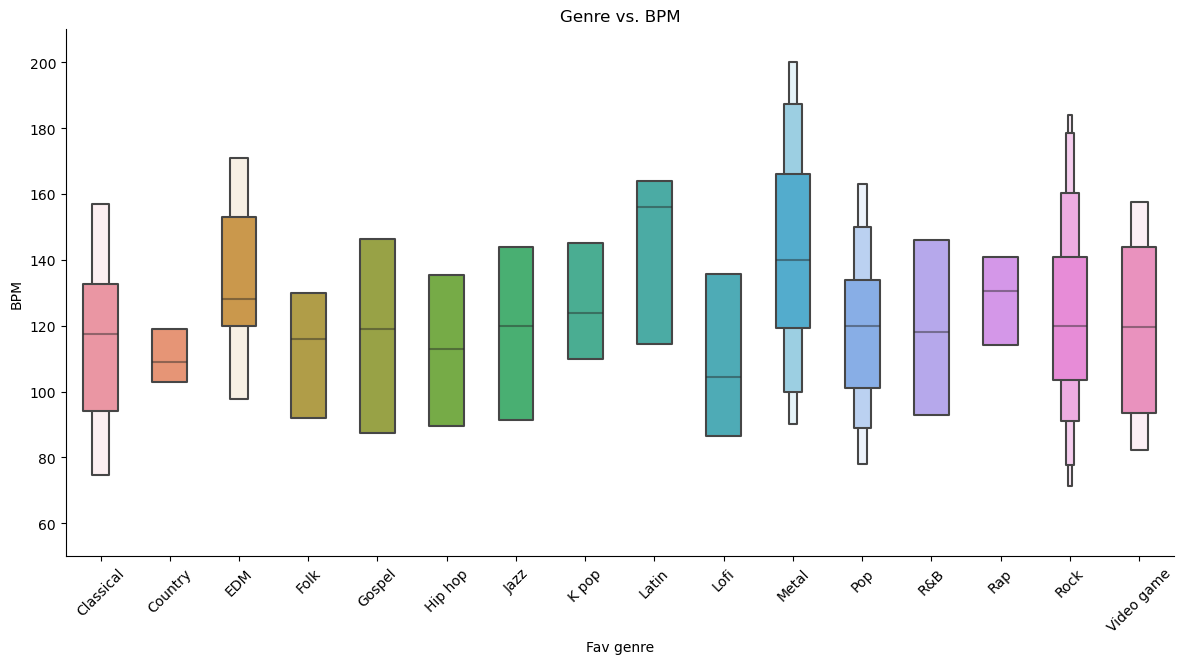

In [35]:
sns.catplot(
    data = df.sort_values("Fav genre"),
    x = "Fav genre", y= "BPM", kind = "boxen",
    height = 6, aspect = 2, width = 0.5, showfliers = False)

plt.xticks(rotation = 45)
plt.title('Genre vs. BPM')
plt.ylim(50,210)
plt.show()

(array([[8.94614421e-05, 0.00000000e+00, 8.94614421e-05, 2.68384326e-04,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00],
        [6.26230095e-04, 2.68384326e-04, 4.47307211e-04, 3.57845768e-04,
         0.00000000e+00, 0.00000000e+00, 8.94614421e-05, 8.94614421e-05,
         0.00000000e+00, 8.94614421e-05],
        [2.32599750e-03, 1.16299875e-03, 8.94614421e-04, 4.47307211e-04,
         8.05152979e-04, 8.05152979e-04, 6.26230095e-04, 5.36768653e-04,
         0.00000000e+00, 3.57845768e-04],
        [3.39953480e-03, 8.05152979e-04, 1.07353731e-03, 9.84075863e-04,
         3.57845768e-04, 1.25246019e-03, 2.68384326e-04, 4.47307211e-04,
         4.47307211e-04, 8.05152979e-04],
        [4.83091787e-03, 2.14707461e-03, 1.69976740e-03, 1.43138307e-03,
         7.15691537e-04, 7.15691537e-04, 5.36768653e-04, 4.47307211e-04,
         7.15691537e-04, 2.68384326e-04],
        [3.04168903e-03, 1.25246019e-03, 1.34192163e-03, 6.2

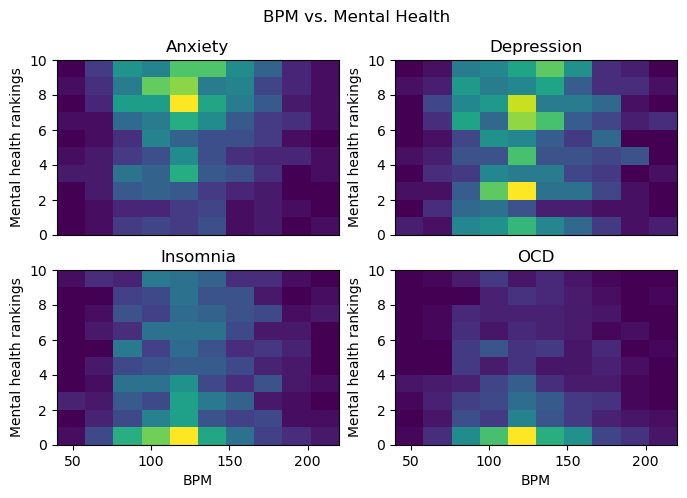

In [37]:
fig = plt.figure(figsize=(8,5))

plt.suptitle("BPM vs. Mental Health")

y = df["Anxiety"]
y2 = df["Depression"]
y3 = df["Insomnia"]
y4 = df["OCD"]
X = df["BPM"]

ax = fig.add_subplot(221)
plt.title("Anxiety")
plt.xticks([])
plt.ylabel("Mental health rankings")
plt.hist2d(x,y, density = True)

ax = fig.add_subplot(222)
plt.title("Depression")
plt.xticks([])
plt.ylabel("Mental health rankings")
plt.hist2d(x,y2, density = True)

ax = fig.add_subplot(223)
plt.title("Insomnia")
plt.xlabel("BPM")
plt.ylabel("Mental health rankings")
plt.hist2d(x,y3, density = True)

ax = fig.add_subplot(224)
plt.title("OCD")
plt.xlabel("BPM")
plt.ylabel("Mental health rankings")
plt.hist2d(x,y4, density = True)

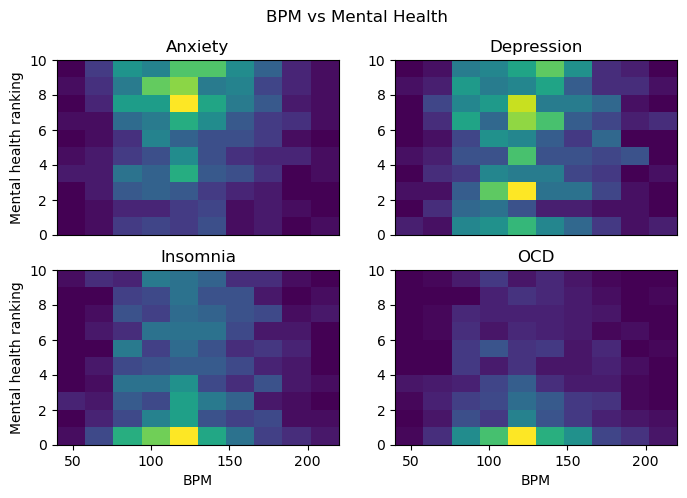

In [36]:
fig = plt.figure(figsize=(8, 5))

plt.suptitle("BPM vs Mental Health")

y = df["Anxiety"]
y2 = df["Depression"]
y3 = df["Insomnia"]
y4 = df["OCD"]
x = df["BPM"]

ax = fig.add_subplot(221)
plt.title('Anxiety')
plt.xticks([])
plt.ylabel('Mental health ranking')
plt.hist2d(x,y, density = True);


ax = fig.add_subplot(222)
plt.title('Depression')
plt.xticks([])
plt.hist2d(x,y2, density = True);

ax = fig.add_subplot(223)
plt.title('Insomnia')
plt.ylabel('Mental health ranking')
plt.xlabel('BPM')
plt.hist2d(x,y3, density = True);

ax = fig.add_subplot(224)
plt.title('OCD')
plt.xlabel('BPM')
plt.hist2d(x,y4, density = True);

In [38]:
df["MH Score"] = df["Anxiety"] + df['Depression'] + df['Insomnia'] + df['OCD']

In [41]:
df.nsmallest(50, ["MH Score"])["BPM"].mean()

123.26

In [42]:
df.nlargest(50, ['MH Score'])['BPM'].mean()

122.26

It's obvious that there's no clear coorelation between BPM and mental health rankings

## Genres

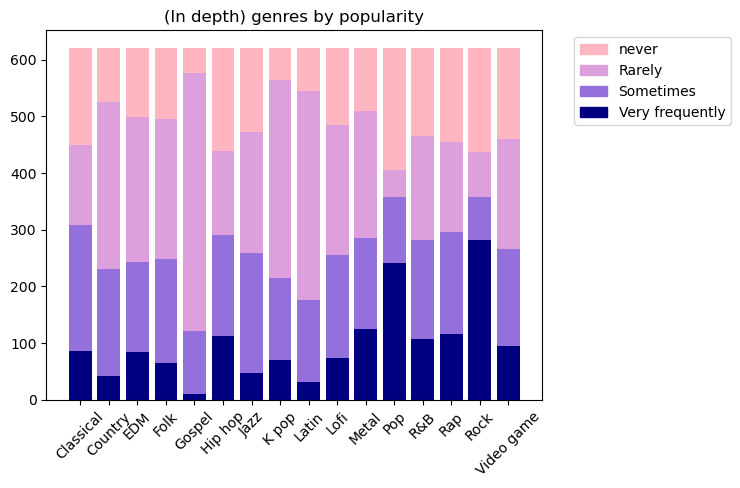

In [55]:
import matplotlib.patches as mpatches

i = 11

r_dist = []
s_dist = []
n_dist = []
vf_dist = []

while i != 27:
    freq_dist = df.iloc[:, i].value_counts().sort_index(ascending=True).tolist()
    r_dist.append(freq_dist[0])
    s_dist.append(freq_dist[1])
    n_dist.append(freq_dist[2])
    vf_dist.append(freq_dist[3])

    i +=1

fig, ax = plt.subplots()

for i in range (0,16):
    ax.bar(i, r_dist[i], label='Rare', bottom =vf_dist[i] + s_dist[i], color = "plum" )
    ax.bar(i, s_dist[i], label='Sometimes', bottom = vf_dist[i], color = "mediumpurple")
    ax.bar(i, n_dist[i], label='Never', bottom=vf_dist[i] + s_dist[i] + r_dist[i], color = "lightpink")
    ax.bar(i, vf_dist[i], label='Very frequently', color = "navy")

ax.set_title('(In depth) genres by popularity')
ax.set_xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])
ax.set_xticklabels(g_all)
plt.xticks(rotation = 45)

patch1 = mpatches.Patch(color='lightpink', label='never')
patch2 = mpatches.Patch(color= 'plum', label='Rarely')
patch3 = mpatches.Patch(color='mediumpurple', label='Sometimes')
patch4 = mpatches.Patch(color='navy', label='Very frequently')

plt.legend(handles=[patch1,patch2,patch3,patch4], bbox_to_anchor=(1.05, 1.0), loc='upper left')